# 0.환경설정

In [ ]:
#%git clone https://github.com/Belval/TextRecognitionDataGenerator.git
#%git clone https://github.com/DaveLogs/TRDG2DTRB.git

In [ ]:
import os
os.chdir("C:/workspace_project/AIproject/TextRecognitionDataGenerator")

In [ ]:
# %pip install -r requirements.txt

In [ ]:
# %pip install -r requirements-hw.txt

In [ ]:
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [1]:
import torch
print(torch.cuda.is_available())

True


In [2]:
import os
os.getcwd()

'c:\\workspace_project\\AIproject'

# 1.학습데이터 생성

In [ ]:
import os
os.chdir("C:/workspace_project/AIproject/TextRecognitionDataGenerator/trdg")

In [ ]:
# TextRecognitionDataGenerator 프로젝트를 이용해 한글 학습데이터 생성하기
# TextRecognitionDataGenerator 프로젝트 root에서 실행

# training: 100,00개
!python run.py \
        --output_dir "../.././workspace/step1/trainingpr" \
        --language "ko" \
        --count 200000

In [ ]:
import os
import shutil
import random

# 이미지 파일이 있는 디렉토리
src_dir = "../.././workspace/step1/trainingpr"

# 훈련 데이터와 검증 데이터를 저장할 디렉토리
train_dir = "../.././workspace/step1/trainingprt"
valid_dir = "../.././workspace/step1/validationprt"

# 디렉토리 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# 이미지 파일 목록 가져오기
files = os.listdir(src_dir)

# 파일 목록을 무작위로 섞기
random.shuffle(files)

# 80-20 비율로 나누기
split_idx = int(len(files) * 0.8)
train_files = files[:split_idx]
valid_files = files[split_idx:]

# 파일을 훈련 데이터와 검증 데이터 디렉토리로 이동
for file in train_files:
    shutil.move(os.path.join(src_dir, file), train_dir)

for file in valid_files:
    shutil.move(os.path.join(src_dir, file), valid_dir)

In [ ]:
import os
os.chdir('C:/workspace_project/AIproject/TRDG2DTRB')
os.getcwd()

In [ ]:
# TRDG2DTRB 프로젝트를 이용해 한글 학습데이터 변환하기
# TRDG2DTRB 프로젝트 root에서 실행

# train 학습데이터 변환
!python convert.py \
        --input_path ".././workspace/step1/trainingprt" \
        --output_path ".././workspace/step2/trainingprt"

# validation 학습데이터 변환
!python convert.py \
        --input_path ".././workspace/step1/validationprt" \
        --output_path ".././workspace/step2/validationprt"

# # test 학습데이터 변환
# !python3 convert.py \
#         --input_path ".././workspace/step1/testprt" \
#         --output_path ".././workspace/step2/testprt"

In [ ]:
import os
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')
os.getcwd()

In [ ]:
%pip install fire lmdb

In [ ]:
# deep-text-recognition-benchmark 프로젝트로 학습데이터를 lmdb포맷으로 변환
# deep-text-recognition-benchmark 프로젝트 root에서 실행

# training 데이터 변환
!python create_lmdb_dataset.py \
        --inputPath ".././workspace/step2/trainingprt/" \
        --gtFile ".././workspace/step2/trainingprt/gt.txt" \
        --outputPath ".././workspace/step3/trainingprt"

# validation 데이터 변환
!python create_lmdb_dataset.py \
        --inputPath ".././workspace/step2/validationprt/" \
        --gtFile ".././workspace/step2/validationprt/gt.txt" \
        --outputPath ".././workspace/step3/validationprt"

# # test 데이터 변환
# !python create_lmdb_dataset.py \
#         --inputPath ".././workspace/step2/testprt/" \
#         --gtFile ".././workspace/step2/testprt/gt.txt" \
#         --outputPath ".././workspace/step3/testprt"

# 2.학습데이터 변환

In [4]:
import os
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')
os.getcwd()

'C:\\workspace_project\\AIproject\\deep-text-recognition-benchmark'

In [5]:
!python create_lmdb_dataset.py \
        --inputPath "C:/workspace_project/korean_characters/Training/[원천]Training_필기체/1.글자" \
        --gtFile "C:/workspace_project/korean_characters/Training/[원천]Training_필기체/1.글자/gt.txt" \
        --outputPath "C:/workspace_project/AIproject/workspace/AIHubData/byChars/Training"


Written 1000 / 242722
Written 2000 / 242722
Written 3000 / 242722
Written 4000 / 242722
Written 5000 / 242722
Written 6000 / 242722
Written 7000 / 242722
Written 8000 / 242722
Written 9000 / 242722
Written 10000 / 242722
Written 11000 / 242722
Written 12000 / 242722
Written 13000 / 242722
Written 14000 / 242722
Written 15000 / 242722
Written 16000 / 242722
Written 17000 / 242722
Written 18000 / 242722
Written 19000 / 242722
Written 20000 / 242722
Written 21000 / 242722
Written 22000 / 242722
Written 23000 / 242722
Written 24000 / 242722
Written 25000 / 242722
Written 26000 / 242722
Written 27000 / 242722
Written 28000 / 242722
Written 29000 / 242722
Written 30000 / 242722
Written 31000 / 242722
Written 32000 / 242722
Written 33000 / 242722
Written 34000 / 242722
Written 35000 / 242722
Written 36000 / 242722
Written 37000 / 242722
Written 38000 / 242722
Written 39000 / 242722
Written 40000 / 242722
Written 41000 / 242722
Written 42000 / 242722
Written 43000 / 242722
Written 44000 / 2427

In [6]:
!python create_lmdb_dataset.py \
        --inputPath "C:/workspace_project/korean_characters/validation/[원천]validation_필기체/1.글자" \
        --gtFile "C:/workspace_project/korean_characters/validation/[원천]validation_필기체/1.글자/gt.txt" \
        --outputPath "C:/workspace_project/AIproject/workspace/AIHubData/byChars/validation"

Written 1000 / 33114
Written 2000 / 33114
Written 3000 / 33114
Written 4000 / 33114
Written 5000 / 33114
Written 6000 / 33114
Written 7000 / 33114
Written 8000 / 33114
Written 9000 / 33114
Written 10000 / 33114
Written 11000 / 33114
Written 12000 / 33114
Written 13000 / 33114
Written 14000 / 33114
Written 15000 / 33114
Written 16000 / 33114
Written 17000 / 33114
Written 18000 / 33114
Written 19000 / 33114
Written 20000 / 33114
Written 21000 / 33114
Written 22000 / 33114
Written 23000 / 33114
Written 24000 / 33114
Written 25000 / 33114
Written 26000 / 33114
Written 27000 / 33114
Written 28000 / 33114
Written 29000 / 33114
Written 30000 / 33114
Written 31000 / 33114
Written 32000 / 33114
Written 33000 / 33114
Created dataset with 33114 samples


In [8]:
!python create_lmdb_dataset.py \
        --inputPath "C:/workspace_project/korean_characters/test/[원천]test_필기체/1.글자" \
        --gtFile "C:/workspace_project/korean_characters/test/[원천]test_필기체/1.글자/gt.txt" \
        --outputPath "C:/workspace_project/AIproject/workspace/AIHubData/byChars/test"

Written 1000 / 34164
Written 2000 / 34164
Written 3000 / 34164
Written 4000 / 34164
Written 5000 / 34164
Written 6000 / 34164
Written 7000 / 34164
Written 8000 / 34164
Written 9000 / 34164
Written 10000 / 34164
Written 11000 / 34164
Written 12000 / 34164
Written 13000 / 34164
Written 14000 / 34164
Written 15000 / 34164
Written 16000 / 34164
Written 17000 / 34164
Written 18000 / 34164
Written 19000 / 34164
Written 20000 / 34164
Written 21000 / 34164
Written 22000 / 34164
Written 23000 / 34164
Written 24000 / 34164
Written 25000 / 34164
Written 26000 / 34164
Written 27000 / 34164
Written 28000 / 34164
Written 29000 / 34164
Written 30000 / 34164
Written 31000 / 34164
Written 32000 / 34164
Written 33000 / 34164
Written 34000 / 34164
Created dataset with 34164 samples


# 3.커스텀모델 학습

In [ ]:
# !git clone https://github.com/clovaai/deep-text-recognition-benchmark.git

In [ ]:
%pip install lmdb pillow torchvision nltk natsort


In [9]:
import os
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')

In [ ]:
# # deep-text-recognition-benchmark 프로젝트를 이용한 모델 학습
# # deep-text-recognition-benchmark 프로젝트 root에서 실행
# !python train.py \
#         --train_data ".././workspace/AIHubData/byWords/Training/" \
#         --valid_data ".././workspace/AIHubData/byWords/Validation/" \
#         --select_data / \
#         --batch_ratio 1 \
#         --batch_size 128 \
#         --Transformation None  \
#         --FeatureExtraction VGG \
#         --SequenceModeling BiLSTM \
#         --Prediction CTC \
#         --workers 0 \
#         --num_iter 1000 \
#         --valInterval 100 \
#         --input_channel 1 \
#         --output_channel 256 \
#         --hidden_size 256 \
#         --saved_model ".././workspace/pre_trained_model/korean_g2.pth" \
#         --FT

In [10]:
# deep-text-recognition-benchmark 프로젝트를 이용한 모델 학습
# deep-text-recognition-benchmark 프로젝트 root에서 실행
# EasyOCR에서 사용하는 모델은 'None-VGG-BiLSTM-CTC' 조합이다.
!python train.py \
    --train_data C:/workspace_project/AIproject/workspace/AIHubData/byChars/Training/ \
    --valid_data C:/workspace_project/AIproject/workspace/AIHubData/byChars/Validation/ \
    --select_data / \
    --batch_ratio 1 \
    --Transformation None \
    --FeatureExtraction VGG \
    --SequenceModeling BiLSTM \
    --Prediction CTC \
    --workers 0 \
    --num_iter 500 \
    --valInterval 100 \
    --input_channel 1 \
    --output_channel 256 \
    --hidden_size 256 \
    --saved_model C:/workspace_project/AIproject/workspace/pre_trained_model/korean_g2.pth \
    --FT

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: C:/workspace_project/AIproject/workspace/AIHubData/byChars/Training/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    C:/workspace_project/AIproject/workspace/AIHubData/byChars/Training/	 dataset: /
sub-directory:	/.	 num samples: 95113
num total samples of /: 95113 x 1.0 (total_data_usage_ratio) = 95113
num samples of / per batch: 192 x 1.0 (batch_ratio) = 192
--------------------------------------------------------------------------------
Total_batch_size: 192 = 192
--------------------------------------------------------------------------------
dataset_root:    C:/workspace_project/AIproject/workspace/AIHubData/byChars/Validation/	 dataset: /
sub-directory

3.4 모델 테스트

In [11]:
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')
os.getcwd()

'C:\\workspace_project\\AIproject\\deep-text-recognition-benchmark'

In [18]:
!python test.py \
    --eval_data C:/workspace_project/AIproject/workspace/AIHubData/byChars/test/ \
    --saved_model C:/workspace_project/AIproject/workspace/pre_trained_model/korean_g2.pth \
    --workers 0 \
    --batch_size 192 \
    --Transformation None \
    --FeatureExtraction VGG \
    --SequenceModeling BiLSTM \
    --Prediction CTC \
    --batch_max_length 25 \
    --imgH 32 \
    --imgW 100 \
    --input_channel 1 \
    --output_channel 256 \
    --hidden_size 256\

No Transformation module specified
model input parameters 32 100 20 1 256 256 1009 25 None VGG BiLSTM CTC
loading pretrained model from C:/workspace_project/AIproject/workspace/pre_trained_model/korean_g2.pth
dataset_root:    C:/workspace_project/AIproject/workspace/AIHubData/byChars/test/	 dataset: /
sub-directory:	/.	 num samples: 13347
13.861


# 4.모델 사용하기

In [ ]:
! git clone https://github.com/JaidedAI/EasyOCR.git


In [ ]:
import os
os.chdir('C:/workspace_project/AIproject/EasyOCR')

In [ ]:
import torch
print(f"Torch CUDA available? : {torch.cuda.is_available()}")

In [ ]:
!python run.py

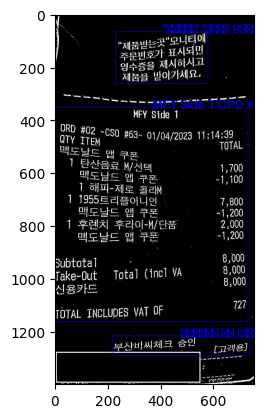

['"제품반논곳\' \'보니티에 9문동가 표시되픽 엉주증흘 제시하시고 제품지 받이기세요;', 'MFY Side 1 OPD #02 -GSO #63 OTY ITE 01/04/2023 11;14;39 TOTAL 맥도날닫_업 구돈 1 팀산음료 M선택 1,700 맥도날드 업 구론 1,100 1 해피-제로 콜라 1 1955트리끌어니언 7,800 맥도날드 업 구돈 200 1 후렌치 후라이-문단품 2,000 맥도날드 업 구돈 -1,200 Subtotal 8,000 Take-Dut Total (incl YA 8,000 8,000 신용카드 727 TOTAL INCLUDES VAT @F', '부산비씨체크 승인 [고객용]']


In [19]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(["ko", "en"], gpu=True)
result = reader.readtext(
    "C:/workspace_project/AIproject/ocr-preprocessor-main/img_preprocessed.jpg",
    paragraph=True,
)
result2 = reader.readtext(
    "C:/workspace_project/AIproject/ocr-preprocessor-main/img_preprocessed.jpg",
    detail=0,
    paragraph=True,
)

img = cv2.imread(
    "C:/workspace_project/AIproject/ocr-preprocessor-main/img_preprocessed.jpg"
)

img = Image.fromarray(img)

font = ImageFont.load_default()
font = font.font_variant(size=48)

draw = ImageDraw.Draw(img)

for i in result:
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]

    draw.rectangle(((x, y), (x + w, y + h)), outline="blue", width=2)
    draw.text((int((x + x + w) / 2), y - 40), str(i[1]), font=font, fill="blue")

plt.imshow(img)
plt.show()
print(result2)

In [ ]:
import os
os.chdir('C:/workspace_project/AIproject/ocr-preprocessor-main')

In [ ]:
!python main.py